In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


Step 1: Data Extraction
Dataset Loaded:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]

Step 2: Data Cleaning

Duplicates removed.

Han

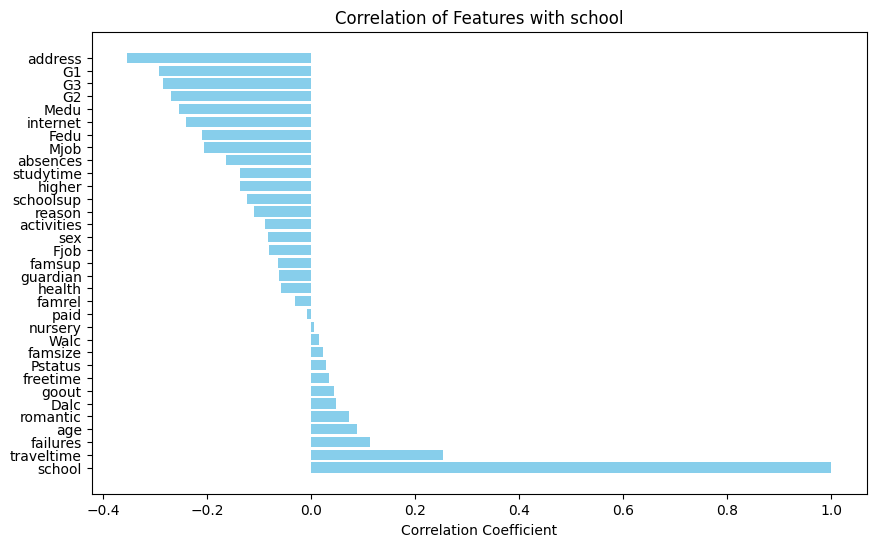

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

print("Step 1: Data Extraction")
df = pd.read_csv("student-por.csv")
print("Dataset Loaded:")
print(df.head())

print("\nStep 2: Data Cleaning")

df.drop_duplicates(inplace=True)
print("\nDuplicates removed.")

print("\nHandling missing values:")
df.fillna(df.mean(numeric_only=True), inplace=True)
print("Missing values filled with column means.")

print("\nEncoding categorical columns:")
label_cols = df.select_dtypes(include=['object']).columns 
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])  
print("Categorical columns encoded.")

print("\nStep 3: Data Integration (Not needed in this case as only one dataset is used)")

print("\nStep 4: Data Transformation")
numerical_cols = df.select_dtypes(include=[np.number]).columns  
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols]) 
print("Numerical columns scaled.")

print("\nStep 5: Data Analysis - Exploratory Data Analysis")

print("\nStatistical Summary of the Dataset:")
print(df.describe())

print("\nGenerating and Displaying Correlation Matrix:")
corr_matrix = df.corr()

print("\nCorrelation Matrix:")
print(corr_matrix)

print("\nPlotting Correlation Bar Graph:")
corr_features = corr_matrix.iloc[:, 0]  
corr_features = corr_features.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(corr_features.index, corr_features.values, color='skyblue')
plt.xlabel('Correlation Coefficient')
plt.title('Correlation of Features with ' + corr_features.index[0])
plt.show()
